<a href="https://colab.research.google.com/github/Oseiasdfarias/Modelagem_e_Simulacao_de_Sistemas/blob/main/analise_generalista_de_um_sistema_de_primeira_Ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Análise Generalista de um Sistema Dinâmico LIT de 1° Ordem <h1/>

Podemos modelar um **Sistema Dinâmico LIT de 1° Ordem** através de uma **EDO**, como mostrado abaixo:

<br>

$$a_1\dfrac{dy(t)}{dt} + a_0y(t) = x(t)$$

<br>

**Obs**: As condições iniciais do sistema são consideradas nulas.

<br>

Aplicando a Transformada de Laplace $\bf{\mathscr{L}}$, temos:

<br>

$$a_1Sy(s) + a_0y(s) = x(s)$$ 

<br>

Agora podemos encontrar a **Função de Transferência** $\bf{G(s)}$ desse sistema:

<br>

$$(a_1S + a_0)y(s) = x(s)$$

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1}{(a_1S + a_0)}$$

<br>

Podemos manipular $\bf{G(s)}$ e obter diferentes equações equivalentes, como mostrado abaixo:

<br>

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1}{(a_1S + a_0)} = \dfrac{1/a_1}{(S + a_0/a_1)} = \dfrac{1/a_0}{(a_1/a_0S + 1)} $$

<br>

Para generalizarmos a análise desse sistema, vamos está interesados na última forma de escrita essa equação, como segue abaixo:

<br>

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1/a_0}{(a_1/a_0S + 1)} $$

<br>

Forma Genérica:

<br>

$$G(s) = \dfrac{K}{(\tau S + 1)} $$

<br>

**Onde:**

> + $K$ : Ganho do Sistema
> + $\tau$ : Constante de Temnpo

<br>

<h2 align="center"> Analisando a Resposta ao Degrau $u(t)$ <h2/>

Vamos analisar a resposta ao Degrau aplicado a esse sistema.

A transformada de Laplace do degrau é dada por, $u(t) = \dfrac{1}{S}$

<br>

Decompondo a Função abaixo em **Frações Parciais**, temos:

<br>

$$Y(s) = \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S}$$

<br>

$$Y(s) = \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} = \dfrac{A}{S} + \dfrac{B}{\tau S + 1}$$

Encontrando o valor de $\bf{A}$:

<br>

$$A = \left. \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} \cdot S \right |_{s=0} = K$$

Encontrando o valor de $\bf{B}$:

<br>

$$B = \left. \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} \cdot (\tau S + 1) \right |_{s= - \dfrac{1}{\tau}} = -KJ$$

<br>

Logo, 

<br>

$$Y(s) = \dfrac{K}{S} - \dfrac{KJ}{\tau S + 1}$$

Orgamizando, temos:

<br>

$$Y(s) = \dfrac{K}{S} - \dfrac{K}{S + \dfrac{1}{\tau}}$$


Aplicando a **Transformada de Laplace Inversa**, temos:

<br>

$$Y(t) = \underbrace{Ku(t)}_{\text{Regime Permanente}} - \underbrace{Ke^{-t/\tau} u(t)}_{\text{Transitório}}$$

<br>

$$Y(t) = K(1 - e^{-t/ \tau)}u(t)$$

\begin{equation} Y(t) = K(\underbrace{1}_{\text{Modo Catac. da Entrada}} - \underbrace{e^{-t/\tau}}_{\text{Modo Catac. do Sistema}})u(t)\end{equation}


<br>

Como já vimos, $K$ é o Ganho do sistema, e $\bf{\tau}$ é a constante de tempo.

<br>

**Algumas comclusões**

> + O Transitório do sistema inicia em zero e tende ao valor de $K$, por isso é $K$ é definido como o ganho do sistema.

> + Quando $t = \tau$ o transitório do sistema estará em $63,2\%$ do valor estacionário.

> + Para se alcançar o estado estacionário do sistema é preciso que $t$ seja quatro vezes o valor de $\tau$

$$t = 4\tau$$

Assim, podemos comcluir que quanto maior o valor de $\tau$ mais rápida é a resposta do sistema

<h2 align="center"> Simulação do Sistema <h2/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

**Domínio do Tempo Y(t)**

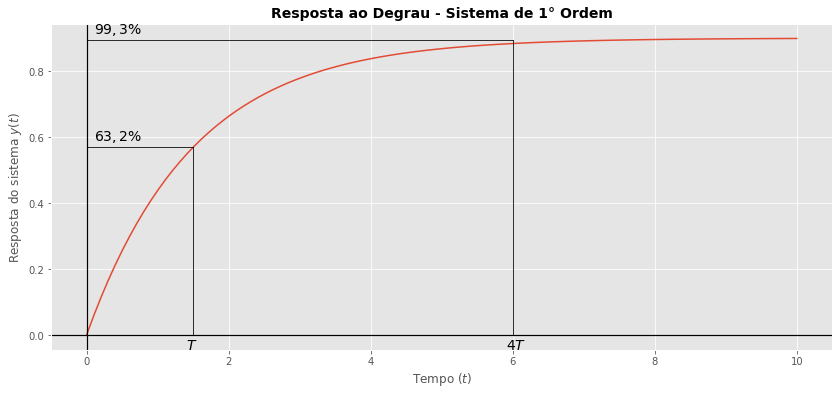

In [ ]:
K = 0.9                       # Ganho do sistema
tau = 1.5                     # Constante de tempo do sistema

# 63,2% do valor k, valor estacionário do sistema
K_t1 = 0.632*0.9
K_t4 = 0.993*0.9

t = np.linspace(0, 10, 100)   # Valores de t para simulação
y_t = K*(1 - np.exp(-t/tau))  # Função com entrada degrau

fig, ax = plt.subplots(1, figsize=(14, 6))
plt.plot(t, y_t)              # Plotagem do gráfico da resposta ao degrau

# Textos dentro os gráficos
ax.plot([ tau, tau], [0, K_t1],color='black', lw=0.8)
ax.plot([ tau, 0], [K_t1, K_t1],color='black', lw=0.8)
ax.text(0.1, K_t1+0.02, "$63,2\%$",fontsize=14)
ax.text(tau-0.1, -0.045, "$T$",fontsize=14)

# Textos dentro os gráficos
ax.plot([ 4*tau, 4*tau], [0, K_t4],color='black', lw=0.8)
ax.plot([ 4*tau, 0], [K_t4, K_t4],color='black', lw=0.8)
ax.text(0.1, K_t4+0.02, "$99,3\%$",fontsize=14)
ax.text(4*tau-0.1, -0.045, "$4T$",fontsize=14)

# Eixos x, y
ax.axhline(0, color='black', lw=1.2)
ax.axvline(0, color='black', lw=1.2)

plt.title("Resposta ao Degrau - Sistema de 1° Ordem", fontweight="bold", fontsize = 14)
plt.xlabel("Tempo $(t)$")
plt.ylabel("Resposta do sistema $y(t)$")
plt.show()

**Domínio da Frequência Y(s)**

Para isso, usaremos a Biblioteca Control-python para escrever a Função de Transferência do Sistema.

In [ ]:
! pip install control

In [ ]:
import control as clt

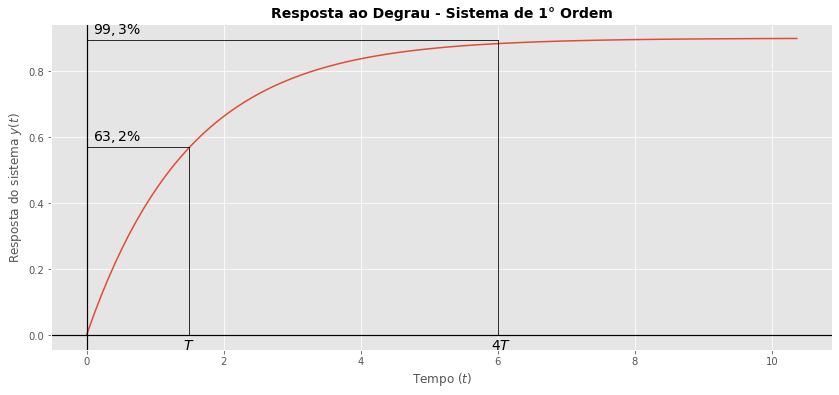

In [ ]:
K = 0.9
tau = 1.5

# 63,2% do valor k, valor estacionário do sistema
K_t1 = 0.632*K
K_t4 = 0.993*K


num = [K]                             # Numerador da Função de Transferência
den = [tau, 1]                        # Denominador da Função de Transferência
G_s = clt.TransferFunction(num, den)  # Função de Transferência

t1, y_t1 = clt.step_response(G_s)     # Simulação da resposta ao Degrau


fig, ax = plt.subplots(1, figsize=(14, 6))
plt.plot(t1, y_t1)              # Plotagem do gráfico da resposta ao degrau

# Textos dentro os gráficos
ax.plot([ tau, tau], [0, K_t1],color='black', lw=0.8)
ax.plot([ tau, 0], [K_t1, K_t1],color='black', lw=0.8)
ax.text(0.1, K_t1+0.02, "$63,2\%$",fontsize=14)
ax.text(tau-0.1, -0.045, "$T$",fontsize=14)

# Textos dentro os gráficos
ax.plot([ 4*tau, 4*tau], [0, K_t4],color='black', lw=0.8)
ax.plot([ 4*tau, 0], [K_t4, K_t4],color='black', lw=0.8)
ax.text(0.1, K_t4+0.02, "$99,3\%$",fontsize=14)
ax.text(4*tau-0.1, -0.045, "$4T$",fontsize=14)

# Eixos x, y
ax.axhline(0, color='black', lw=1.2)
ax.axvline(0, color='black', lw=1.2)

plt.title("Resposta ao Degrau - Sistema de 1° Ordem", fontweight="bold", fontsize = 14)
plt.xlabel("Tempo $(t)$")
plt.ylabel("Resposta do sistema $y(t)$")
plt.show()